In [2]:
#to build a “Propensity to Default” model on the actual data collected on the customers of the lending platform'Lending Club'

In [3]:
# Libraries loading

In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
import seaborn as sns

C:\Users\sivaturi3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
LCD=pd.read_csv("E:\\Personal\\Analytics\\Assignment\\RP\\36months Q1 2014 DATA.csv")

C:\Users\sivaturi3\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
type(LCD)

pandas.core.frame.DataFrame

In [7]:
LCD_sample=LCD.sample(100)

In [8]:
LCD_sample.to_csv("E://lcd_sample.csv")

In [10]:
LCD_sample.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 6651 to 28091
Data columns (total 145 columns):
id                                            0 non-null object
member_id                                     0 non-null float64
loan_amnt                                     100 non-null float64
funded_amnt                                   100 non-null float64
funded_amnt_inv                               100 non-null float64
term                                          100 non-null object
int_rate                                      100 non-null object
installment                                   100 non-null float64
grade                                         100 non-null object
sub_grade                                     100 non-null object
emp_title                                     93 non-null object
emp_length                                    95 non-null object
home_ownership                                100 non-null object
annual_inc                      

In [9]:
#DELETE variables with null values

In [11]:
del LCD['id']
del LCD['member_id']
del LCD['url']
del LCD['desc']
del LCD['next_pymnt_d']
del LCD['annual_inc_joint']
del LCD['dti_joint']
del LCD['open_acc_6m']
del LCD['verification_status_joint']
del LCD['open_act_il']
del LCD['open_il_12m']
del LCD['open_il_24m']
del LCD['mths_since_rcnt_il']
del LCD['total_bal_il']
del LCD['il_util']
del LCD['open_rv_12m']
del LCD['open_rv_24m']
del LCD['max_bal_bc']
del LCD['all_util']
del LCD['revol_bal_joint']

In [12]:
del LCD['sec_app_earliest_cr_line']
del LCD['sec_app_inq_last_6mths']
del LCD['sec_app_mort_acc']
del LCD['sec_app_open_acc']
del LCD['sec_app_revol_util']
del LCD['sec_app_num_rev_accts']
del LCD['sec_app_chargeoff_within_12_mths']
del LCD['sec_app_collections_12_mths_ex_med']
del LCD['sec_app_mths_since_last_major_derog']
del LCD['hardship_type']
del LCD['hardship_reason']
del LCD['hardship_status']
del LCD['hardship_amount']
del LCD['hardship_start_date']
del LCD['payment_plan_start_date']
del LCD['hardship_length']
del LCD['hardship_dpd']
del LCD['hardship_loan_status']
del LCD['orig_projected_additional_accrued_interest']
del LCD['hardship_payoff_balance_amount']
del LCD['hardship_last_payment_amount']

In [13]:
del LCD['inq_fi']
del LCD['total_cu_tl']
del LCD['inq_last_12m']
del LCD['sec_app_open_act_il']
del LCD['deferral_term']
del LCD['hardship_end_date']
del LCD['settlement_term']
del LCD['settlement_percentage']
del LCD['debt_settlement_flag_date']
del LCD['settlement_amount']
del LCD['settlement_status']
del LCD['settlement_date']

In [14]:
LCD.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34078 entries, 0 to 34077
Data columns (total 92 columns):
loan_amnt                         34074 non-null float64
funded_amnt                       34074 non-null float64
funded_amnt_inv                   34074 non-null float64
term                              34074 non-null object
int_rate                          34074 non-null object
installment                       34074 non-null float64
grade                             34074 non-null object
sub_grade                         34074 non-null object
emp_title                         30899 non-null object
emp_length                        31873 non-null object
home_ownership                    34074 non-null object
annual_inc                        34074 non-null float64
verification_status               34074 non-null object
issue_d                           34074 non-null object
loan_status                       34074 non-null object
pymnt_plan                        34074 non-nu

In [15]:
# Convert interest rate, revol until to numerical

In [16]:
LCD['revol_util']=LCD['revol_util'].str.rstrip('%').astype('float')/100.0

In [17]:
LCD['int_rate']=LCD['int_rate'].str.rstrip('%').astype('float')/100.0

In [18]:
LCD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34078 entries, 0 to 34077
Data columns (total 92 columns):
loan_amnt                         34074 non-null float64
funded_amnt                       34074 non-null float64
funded_amnt_inv                   34074 non-null float64
term                              34074 non-null object
int_rate                          34074 non-null float64
installment                       34074 non-null float64
grade                             34074 non-null object
sub_grade                         34074 non-null object
emp_title                         30899 non-null object
emp_length                        31873 non-null object
home_ownership                    34074 non-null object
annual_inc                        34074 non-null float64
verification_status               34074 non-null object
issue_d                           34074 non-null object
loan_status                       34074 non-null object
pymnt_plan                        34074 non-n

In [19]:
from datetime import datetime

In [20]:
LCD.to_csv("E://LCD_new_Q1_notnull.csv")

In [21]:
#select only categorical variables 

In [22]:
LCD_categorical_only=LCD.select_dtypes(include=[np.object])

In [23]:
LCD_categorical_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34078 entries, 0 to 34077
Data columns (total 22 columns):
term                    34074 non-null object
grade                   34074 non-null object
sub_grade               34074 non-null object
emp_title               30899 non-null object
emp_length              31873 non-null object
home_ownership          34074 non-null object
verification_status     34074 non-null object
issue_d                 34074 non-null object
loan_status             34074 non-null object
pymnt_plan              34074 non-null object
purpose                 34074 non-null object
title                   34074 non-null object
zip_code                34074 non-null object
addr_state              34074 non-null object
earliest_cr_line        34074 non-null object
initial_list_status     34074 non-null object
last_pymnt_d            34053 non-null object
last_credit_pull_d      34072 non-null object
application_type        34074 non-null object
hardship_flag    

In [24]:
# Select only numerical variables

In [28]:
LCD_numerics_only=LCD.select_dtypes(include=[np.number])

In [29]:
LCD_numerics_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34078 entries, 0 to 34077
Data columns (total 70 columns):
loan_amnt                         34074 non-null float64
funded_amnt                       34074 non-null float64
funded_amnt_inv                   34074 non-null float64
int_rate                          34074 non-null float64
installment                       34074 non-null float64
annual_inc                        34074 non-null float64
dti                               34074 non-null float64
delinq_2yrs                       34074 non-null float64
inq_last_6mths                    34074 non-null float64
mths_since_last_delinq            17379 non-null float64
mths_since_last_record            6939 non-null float64
open_acc                          34074 non-null float64
pub_rec                           34074 non-null float64
revol_bal                         34074 non-null float64
revol_util                        34060 non-null float64
total_acc                         340

In [30]:
# Missing Value Treatement

In [31]:
LCD_numerics_only1=np.round(LCD_numerics_only.fillna(LCD_numerics_only.mean()),1)

In [32]:
LCD_numerics_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34078 entries, 0 to 34077
Data columns (total 70 columns):
loan_amnt                         34074 non-null float64
funded_amnt                       34074 non-null float64
funded_amnt_inv                   34074 non-null float64
int_rate                          34074 non-null float64
installment                       34074 non-null float64
annual_inc                        34074 non-null float64
dti                               34074 non-null float64
delinq_2yrs                       34074 non-null float64
inq_last_6mths                    34074 non-null float64
mths_since_last_delinq            17379 non-null float64
mths_since_last_record            6939 non-null float64
open_acc                          34074 non-null float64
pub_rec                           34074 non-null float64
revol_bal                         34074 non-null float64
revol_util                        34060 non-null float64
total_acc                         340

In [33]:
LCD_categorical_only1=LCD_categorical_only.copy(deep=True)

In [34]:
LCD_categorical_only2=LCD_categorical_only.copy(lambda x:x.fillna(x.value_counts().index[0]))

In [35]:
LCD_categorical_only2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34078 entries, 0 to 34077
Data columns (total 22 columns):
term                    34074 non-null object
grade                   34074 non-null object
sub_grade               34074 non-null object
emp_title               30899 non-null object
emp_length              31873 non-null object
home_ownership          34074 non-null object
verification_status     34074 non-null object
issue_d                 34074 non-null object
loan_status             34074 non-null object
pymnt_plan              34074 non-null object
purpose                 34074 non-null object
title                   34074 non-null object
zip_code                34074 non-null object
addr_state              34074 non-null object
earliest_cr_line        34074 non-null object
initial_list_status     34074 non-null object
last_pymnt_d            34053 non-null object
last_credit_pull_d      34072 non-null object
application_type        34074 non-null object
hardship_flag    

In [36]:
# Outlier Treatement

In [37]:
LCD_numerics_only2 = LCD_numerics_only1.copy(deep=True)

In [38]:
#LCD_categorical_only1 = LCD_categorical_only.copy(deep=True)

In [40]:
LCD_numerics_only1.loan_amnt.quantile(0.01) #1st Percentile
LCD_numerics_only1.loan_amnt.quantile(0.5) # same a median
LCD_numerics_only1.loan_amnt.quantile(0.99) # 99th Percentile

2000.0

10975.0

35000.0

In [41]:
'''def scale_val(s, val):
    percentiles = s.quantile([0.01, 0.99]).values
    if val <= Percentile[0]:
       return percentiles[0]
    elif val >= Percentiles[1]:
         return Percentiles[1]
    else:
        return val'''

'def scale_val(s, val):\n    percentiles = s.quantile([0.01, 0.99]).values\n    if val <= Percentile[0]:\n       return percentiles[0]\n    elif val >= Percentiles[1]:\n         return Percentiles[1]\n    else:\n        return val'

In [42]:
LCD_numerics_only1.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,34078.000000,34078.000000,34078.00000,34078.00000,34078.000000,3.407800e+04,34078.000000,34078.000000,34078.000000,34078.000000,...,34078.000000,34078.000000,34078.000000,34078.000000,34078.000000,34078.000000,3.407800e+04,3.407800e+04,34078.000000,3.407800e+04
mean,13128.717642,13128.717642,13121.47092,0.12523,441.025788,7.349766e+04,17.119273,0.337966,0.825729,33.507967,...,0.098404,1.889624,94.022812,49.645499,0.156576,0.064834,1.579817e+05,4.369846e+04,18823.096232,3.656099e+04
std,7867.652321,7867.652321,7863.23643,0.04367,265.915632,6.309456e+04,7.564412,0.878076,1.056732,15.471891,...,0.502745,1.438183,8.575963,34.116110,0.395625,0.567890,1.639024e+05,4.254416e+04,19307.787664,3.955689e+04
min,1000.000000,1000.000000,950.00000,0.10000,30.700000,7.500000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,30.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,7200.000000,7200.000000,7200.00000,0.10000,249.300000,4.500000e+04,11.400000,0.000000,0.000000,29.000000,...,0.000000,1.000000,90.900000,22.200000,0.000000,0.000000,4.220600e+04,1.794475e+04,6500.000000,1.106025e+04
50%,10975.000000,10975.000000,10950.00000,0.10000,368.000000,6.250000e+04,16.800000,0.000000,0.000000,33.500000,...,0.000000,2.000000,97.400000,50.000000,0.000000,0.000000,9.636650e+04,3.271200e+04,12700.000000,2.734650e+04
75%,17375.000000,17375.000000,17368.75000,0.20000,577.200000,9.000000e+04,22.700000,0.000000,1.000000,33.500000,...,0.000000,3.000000,100.000000,75.000000,0.000000,0.000000,2.309195e+05,5.490700e+04,24500.000000,4.942650e+04
max,35000.000000,35000.000000,35000.00000,0.30000,1410.000000,7.446395e+06,35.000000,22.000000,6.000000,159.000000,...,22.000000,16.000000,100.000000,100.000000,7.000000,63.000000,3.492496e+06,1.094819e+06,560800.000000,1.027358e+06


In [43]:
for col in LCD_numerics_only1.columns:
    percentiles = LCD_numerics_only1[col].quantile([0.01,0.99]).values
    LCD_numerics_only1[col][LCD_numerics_only1[col] <= percentiles[0]] = percentiles[0]
    LCD_numerics_only1[col][LCD_numerics_only[col]>= percentiles[1]] = percentiles[1]

In [44]:
LCD_numerics_only.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,34074.000000,34074.000000,34074.000000,34074.000000,34074.000000,3.407400e+04,34074.000000,34074.000000,34074.000000,17379.000000,...,34074.000000,34074.000000,34074.000000,33752.000000,34074.000000,34074.000000,3.407400e+04,3.407400e+04,34074.000000,3.407400e+04
mean,13128.717644,13128.717644,13121.470916,0.130195,441.026168,7.349766e+04,17.119556,0.337970,0.825732,33.515622,...,0.098403,1.889623,94.022815,49.645940,0.156571,0.064829,1.579817e+05,4.369846e+04,18823.096232,3.656099e+04
std,7868.114119,7868.114119,7863.697969,0.038099,265.930378,6.309826e+04,7.564629,0.878127,1.056794,21.665770,...,0.502775,1.438268,8.576466,34.280473,0.395648,0.567923,1.639120e+05,4.254665e+04,19308.920950,3.955921e+04
min,1000.000000,1000.000000,950.000000,0.060000,30.710000,7.500000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,30.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,7200.000000,7200.000000,7200.000000,0.096700,249.300000,4.500000e+04,11.410000,0.000000,0.000000,15.000000,...,0.000000,1.000000,90.900000,20.000000,0.000000,0.000000,4.220300e+04,1.794325e+04,6500.000000,1.105625e+04
50%,10975.000000,10975.000000,10950.000000,0.129900,367.975000,6.240000e+04,16.760000,0.000000,0.000000,30.000000,...,0.000000,2.000000,97.400000,50.000000,0.000000,0.000000,9.635100e+04,3.270850e+04,12700.000000,2.734300e+04
75%,17393.750000,17393.750000,17375.000000,0.153100,577.150000,9.000000e+04,22.677500,0.000000,1.000000,49.000000,...,0.000000,3.000000,100.000000,75.000000,0.000000,0.000000,2.309425e+05,5.490925e+04,24500.000000,4.942850e+04
max,35000.000000,35000.000000,35000.000000,0.259900,1409.990000,7.446395e+06,34.990000,22.000000,6.000000,159.000000,...,22.000000,16.000000,100.000000,100.000000,7.000000,63.000000,3.492496e+06,1.094819e+06,560800.000000,1.027358e+06


In [45]:
LCD_categorical_only2.home_ownership.describe()

count        34074
unique           3
top       MORTGAGE
freq         16907
Name: home_ownership, dtype: object

In [46]:
# Dummy Coding

In [47]:
LCD_categorical_only3 = LCD_categorical_only2.copy(deep=True)

In [50]:
for col in LCD_categorical_only3.columns:
    LCD_categorical_only3[col] = pd.Categorical(LCD_categorical_only3[col]).codes

In [52]:
LCD_categorical_only3.info()
LCD_categorical_only3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34078 entries, 0 to 34077
Data columns (total 22 columns):
term                    34078 non-null int8
grade                   34078 non-null int8
sub_grade               34078 non-null int8
emp_title               34078 non-null int16
emp_length              34078 non-null int8
home_ownership          34078 non-null int8
verification_status     34078 non-null int8
issue_d                 34078 non-null int8
loan_status             34078 non-null int8
pymnt_plan              34078 non-null int8
purpose                 34078 non-null int8
title                   34078 non-null int16
zip_code                34078 non-null int16
addr_state              34078 non-null int8
earliest_cr_line        34078 non-null int16
initial_list_status     34078 non-null int8
last_pymnt_d            34078 non-null int8
last_credit_pull_d      34078 non-null int8
application_type        34078 non-null int8
hardship_flag           34078 non-null int8
disburs

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,0,1,7,13861,8,0,0,2,0,0,...,443,45,229,0,25,36,0,0,0,0
1,0,3,18,2616,4,0,2,2,1,0,...,282,9,47,1,24,56,0,0,0,0
2,0,0,4,13604,3,2,1,2,1,0,...,797,44,249,1,35,43,0,0,0,0
3,0,1,7,8097,1,0,1,2,1,0,...,753,4,305,0,35,43,0,0,0,0
4,0,2,10,2187,3,2,1,2,1,0,...,293,9,226,0,13,21,0,0,0,0


In [53]:
LCD_numerics_only1.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_amnt,1.000000,1.000000,0.999995,-0.085560,0.995106,0.511382,0.010934,0.009068,-0.033810,-0.041663,...,-0.011749,-0.035993,0.116471,-0.020303,-0.175112,0.011826,0.371547,0.321567,0.441030,0.213668
funded_amnt,1.000000,1.000000,0.999995,-0.085560,0.995106,0.511382,0.010934,0.009068,-0.033810,-0.041663,...,-0.011749,-0.035993,0.116471,-0.020303,-0.175112,0.011826,0.371547,0.321567,0.441030,0.213668
funded_amnt_inv,0.999995,0.999995,1.000000,-0.085213,0.995133,0.511375,0.010947,0.009005,-0.033667,-0.041615,...,-0.011790,-0.035879,0.116503,-0.020284,-0.175088,0.011841,0.371554,0.321561,0.441037,0.213660
int_rate,-0.085560,-0.085560,-0.085213,1.000000,-0.024014,-0.104350,0.069049,0.038456,0.168986,-0.012708,...,0.016951,0.131701,-0.079820,0.223209,0.052342,0.043271,-0.122914,-0.083971,-0.188145,-0.089810
installment,0.995106,0.995106,0.995133,-0.024014,1.000000,0.498453,0.018509,0.018424,-0.014552,-0.045105,...,-0.006407,-0.019829,0.101785,0.007463,-0.165826,0.019618,0.352015,0.310297,0.409333,0.201774
annual_inc,0.511382,0.511382,0.511375,-0.104350,0.498453,1.000000,-0.245633,0.083696,0.055492,-0.072616,...,0.029390,0.052399,-0.005178,-0.033392,-0.124097,0.054491,0.581949,0.455599,0.382901,0.385483
dti,0.010934,0.010934,0.010947,0.069049,0.018509,-0.245633,1.000000,-0.006415,0.015292,0.000306,...,-0.013801,0.092723,0.088802,0.136196,-0.059217,-0.038794,0.001053,0.314953,0.028460,0.358847
delinq_2yrs,0.009068,0.009068,0.009005,0.038456,0.018424,0.083696,-0.006415,1.000000,0.026405,-0.588749,...,0.590281,-0.046707,-0.426689,-0.004737,-0.059673,0.010060,0.098474,0.033298,-0.071064,0.067972
inq_last_6mths,-0.033810,-0.033810,-0.033667,0.168986,-0.014552,0.055492,0.015292,0.026405,1.000000,0.009899,...,0.031346,0.256598,-0.050100,-0.086328,0.071117,0.014092,0.029507,0.044269,-0.041259,0.065799
mths_since_last_delinq,-0.041663,-0.041663,-0.041615,-0.012708,-0.045105,-0.072616,0.000306,-0.588749,0.009899,1.000000,...,-0.306641,0.071485,0.110784,0.008269,0.091156,0.007404,-0.102443,-0.038805,-0.034013,-0.042237


In [54]:
# Standardize The Data 

In [55]:
from sklearn.preprocessing import scale

In [56]:
x_scaled=scale(LCD_numerics_only1)

In [57]:
x_scaled=pd.DataFrame(x_scaled, columns=LCD_numerics_only1.columns)

In [58]:
x_scaled.head()
x_scaled.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,0.873570,0.873570,0.874984,-0.579316,0.845523,0.677121,1.697094,-0.42754,-0.797607,0.000866,...,-0.248888,0.802291,0.712773,0.107121,-0.416100,-0.186644,1.176966,1.892446,2.715347,0.802168
1,-1.225849,-1.225849,-1.225619,1.726175,-1.182632,-0.839558,1.006470,-0.42754,-0.797607,-0.554459,...,-0.248888,2.233902,-1.143262,-1.455214,-0.416100,-0.186644,0.348855,-0.465477,-0.732099,-0.284199
2,-0.398805,-0.398805,-0.398108,-0.579316,-0.466345,-0.179069,-0.653684,-0.42754,-0.797607,-0.554459,...,-0.248888,1.518097,-0.890166,-1.455214,-0.416100,3.506151,-0.612856,-0.461789,1.041992,-0.356837
3,-0.405167,-0.405167,-0.404474,-0.579316,-0.417533,-0.301382,0.701001,-0.42754,-0.797607,0.000866,...,-0.248888,-1.345125,0.712773,0.889754,-0.416100,-0.186644,1.375233,0.028738,1.903854,-1.002690
4,0.237383,0.237383,0.238438,-0.579316,0.262429,0.285720,-0.255247,-0.42754,2.131343,2.908152,...,-0.248888,0.086486,-0.118827,-0.282730,2.403628,-0.186644,-0.524964,-0.276642,0.655834,-0.113101


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.407800e+04,3.407800e+04,3.407800e+04,3.407800e+04,3.407800e+04,3.407800e+04,3.407800e+04,3.407800e+04,3.407800e+04,3.407800e+04,...,3.407800e+04,3.407800e+04,3.407800e+04,3.407800e+04,3.407800e+04,3.407800e+04,3.407800e+04,3.407800e+04,3.407800e+04,3.407800e+04
mean,-1.536511e-15,-1.536511e-15,-9.032777e-16,1.424562e-14,-2.683833e-17,-9.433479e-17,-2.548314e-16,-8.690023e-16,8.684680e-15,9.848691e-16,...,-1.907016e-15,-1.489131e-15,-9.918497e-16,6.800846e-16,-2.196854e-15,1.993796e-15,1.437288e-17,-2.354687e-16,3.451061e-16,6.020607e-16
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,...,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.416706e+00,-1.416706e+00,-1.416583e+00,-5.793155e-01,-1.414583e+00,-1.328809e+00,-1.955245e+00,-4.275401e-01,-7.976071e-01,-1.991769e+00,...,-2.488882e-01,-1.345125e+00,-3.746531e+00,-1.455214e+00,-4.160998e-01,-1.866445e-01,-9.874815e-01,-1.074779e+00,-1.023117e+00,-1.002690e+00
25%,-7.550703e-01,-7.550703e-01,-7.545745e-01,-5.793155e-01,-7.244049e-01,-6.683201e-01,-7.599341e-01,-4.275401e-01,-7.976071e-01,-2.931296e-01,...,-2.488882e-01,-6.293198e-01,-3.839748e-01,-8.044851e-01,-4.160998e-01,-1.866445e-01,-7.532875e-01,-6.680815e-01,-6.761342e-01,-6.942841e-01
50%,-2.747485e-01,-2.747485e-01,-2.771647e-01,-5.793155e-01,-2.752593e-01,-2.402251e-01,-4.274757e-02,-4.275401e-01,-7.976071e-01,8.655883e-04,...,-2.488882e-01,8.648563e-02,3.994165e-01,1.039118e-02,-4.160998e-01,-1.866445e-01,-3.937758e-01,-2.734352e-01,-3.291510e-01,-2.401557e-01
75%,5.395719e-01,5.395719e-01,5.400018e-01,1.726175e+00,5.163266e-01,4.324956e-01,7.408451e-01,-4.275401e-01,1.787097e-01,8.655883e-04,...,-2.488882e-01,8.022911e-01,7.127730e-01,7.431936e-01,-4.160998e-01,-1.866445e-01,4.993728e-01,3.197134e-01,3.312364e-01,3.755266e-01
max,2.782134e+00,2.782134e+00,2.784624e+00,1.726175e+00,2.962978e+00,4.346507e+00,2.188499e+00,4.912676e+00,3.107660e+00,2.908152e+00,...,5.819375e+00,2.949707e+00,7.127730e-01,1.475996e+00,2.403628e+00,7.198946e+00,3.734099e+00,4.451823e+00,4.196685e+00,4.285230e+00


In [59]:
from sklearn.decomposition import PCA

In [60]:
pca=PCA().fit(x_scaled)

In [61]:
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [62]:
str(pca.explained_variance_ratio_.sum())

'1.0'

In [63]:
pca=PCA(20).fit(x_scaled)

In [64]:
str(pca.explained_variance_ratio_.sum())

'0.8201812813351235'

In [65]:
# Eigen Values
pca.explained_variance_

array([11.66493566,  6.64085528,  3.93371173,  3.48944134,  3.38568392,
        2.92824154,  2.46218149,  2.18637954,  2.00607949,  1.76571343,
        1.45365374,  1.39011123,  1.24964158,  1.17630703,  1.06793253,
        1.03219598,  0.99951779,  0.99626508,  0.94741189,  0.89667678])

In [66]:
# Create dataframe of components
pca_LCD_numerics_only1=pd.DataFrame(pca.components_,columns=LCD_numerics_only1.columns)
pca_LCD_numerics_only1

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,0.237831,0.237831,0.237831,-0.035553,0.234568,0.176553,0.035943,0.015946,0.009598,-0.024736,...,0.001354,0.040688,0.044106,-0.033939,-0.061860,-0.001868,0.174703,0.153603,0.197844,0.107757
1,-0.173649,-0.173649,-0.173637,0.018980,-0.171854,-0.096081,0.066702,-0.013660,0.076968,0.027675,...,-0.012529,0.177194,0.005800,-0.101615,0.047868,0.002307,-0.065663,-0.023147,0.030754,-0.016326
2,-0.109940,-0.109940,-0.109970,-0.040098,-0.115116,0.118609,0.035434,0.279951,0.062688,-0.232568,...,0.223425,0.045166,-0.162177,0.002057,-0.016884,-0.011879,0.243643,0.208063,-0.061515,0.242022
3,-0.026325,-0.026325,-0.026364,-0.193393,-0.050605,0.016073,-0.193554,0.037921,-0.055920,-0.093734,...,0.029020,-0.094688,0.041538,-0.356165,-0.034797,-0.031552,0.037589,-0.137690,0.246189,-0.150024
4,0.021994,0.021994,0.021964,0.075953,0.033661,-0.090285,0.006436,0.301242,-0.086437,-0.324815,...,0.232831,-0.159705,-0.113178,0.110843,-0.044499,0.002538,-0.159632,-0.165363,-0.023742,-0.188840
5,0.128639,0.128639,0.128697,0.105952,0.144993,0.013167,-0.137925,0.135319,0.216752,-0.049752,...,0.136537,0.230465,-0.209070,-0.152960,0.139163,0.106260,-0.106177,-0.151771,-0.160671,-0.087785
6,-0.045982,-0.045982,-0.046029,-0.030853,-0.047126,0.068949,-0.163570,-0.013845,-0.050630,0.173852,...,0.042686,-0.147696,-0.236527,0.071181,0.171183,0.160617,0.075573,-0.146982,-0.020145,-0.177112
7,-0.007463,-0.007463,-0.007372,0.155670,0.004075,0.110722,-0.148422,-0.029151,0.116590,-0.014819,...,-0.052935,0.091898,0.025468,0.066104,-0.039372,-0.021195,0.205163,-0.114150,0.089614,-0.185791
8,0.079913,0.079913,0.079867,-0.088453,0.074187,-0.042782,0.089462,0.009885,-0.080105,0.077615,...,0.043036,-0.141910,-0.061152,-0.115780,0.009240,0.045200,-0.149339,0.093030,0.008294,0.136104
9,-0.003378,-0.003378,-0.003345,0.013262,-0.002039,0.038830,0.013841,-0.046238,0.018596,-0.104154,...,-0.138710,-0.037024,0.216531,-0.020721,0.448114,0.397139,0.024006,0.077818,0.007065,0.087214


In [72]:
pca_LCD_numerics_only1.to_csv("E://pca_LCD_numerics_only1.csv")

In [73]:
pca_LCD_numerics_only2=pca_LCD_numerics_only1.copy(deep=True)

In [74]:
pca_LCD_numerics_only3=pca_LCD_numerics_only1.apply(lambda x:x.abs())

In [75]:
pca_LCD_numerics_only3
pca_LCD_numerics_only3.to_csv("E://pca_LCD_numerics_only3.csv")

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,0.237831,0.237831,0.237831,0.035553,0.234568,0.176553,0.035943,0.015946,0.009598,0.024736,...,0.001354,0.040688,0.044106,0.033939,0.061860,0.001868,0.174703,0.153603,0.197844,0.107757
1,0.173649,0.173649,0.173637,0.018980,0.171854,0.096081,0.066702,0.013660,0.076968,0.027675,...,0.012529,0.177194,0.005800,0.101615,0.047868,0.002307,0.065663,0.023147,0.030754,0.016326
2,0.109940,0.109940,0.109970,0.040098,0.115116,0.118609,0.035434,0.279951,0.062688,0.232568,...,0.223425,0.045166,0.162177,0.002057,0.016884,0.011879,0.243643,0.208063,0.061515,0.242022
3,0.026325,0.026325,0.026364,0.193393,0.050605,0.016073,0.193554,0.037921,0.055920,0.093734,...,0.029020,0.094688,0.041538,0.356165,0.034797,0.031552,0.037589,0.137690,0.246189,0.150024
4,0.021994,0.021994,0.021964,0.075953,0.033661,0.090285,0.006436,0.301242,0.086437,0.324815,...,0.232831,0.159705,0.113178,0.110843,0.044499,0.002538,0.159632,0.165363,0.023742,0.188840
5,0.128639,0.128639,0.128697,0.105952,0.144993,0.013167,0.137925,0.135319,0.216752,0.049752,...,0.136537,0.230465,0.209070,0.152960,0.139163,0.106260,0.106177,0.151771,0.160671,0.087785
6,0.045982,0.045982,0.046029,0.030853,0.047126,0.068949,0.163570,0.013845,0.050630,0.173852,...,0.042686,0.147696,0.236527,0.071181,0.171183,0.160617,0.075573,0.146982,0.020145,0.177112
7,0.007463,0.007463,0.007372,0.155670,0.004075,0.110722,0.148422,0.029151,0.116590,0.014819,...,0.052935,0.091898,0.025468,0.066104,0.039372,0.021195,0.205163,0.114150,0.089614,0.185791
8,0.079913,0.079913,0.079867,0.088453,0.074187,0.042782,0.089462,0.009885,0.080105,0.077615,...,0.043036,0.141910,0.061152,0.115780,0.009240,0.045200,0.149339,0.093030,0.008294,0.136104
9,0.003378,0.003378,0.003345,0.013262,0.002039,0.038830,0.013841,0.046238,0.018596,0.104154,...,0.138710,0.037024,0.216531,0.020721,0.448114,0.397139,0.024006,0.077818,0.007065,0.087214


In [76]:
pca1=pd.DataFrame(np.sort(pca_LCD_numerics_only3.values)[:,-2:],columns=['2nd-largest','largest'])

In [77]:
pca1

,2nd-largest,largest
0,0.237831,0.237831
1,0.229272,0.262932
2,0.253653,0.279951
3,0.358666,0.397510
4,0.318493,0.324815
5,0.234889,0.245338
6,0.253097,0.296121
7,0.417695,0.426707
8,0.471243,0.471972
9,0.448114,0.565897


<Figure size 2160x2160 with 0 Axes>

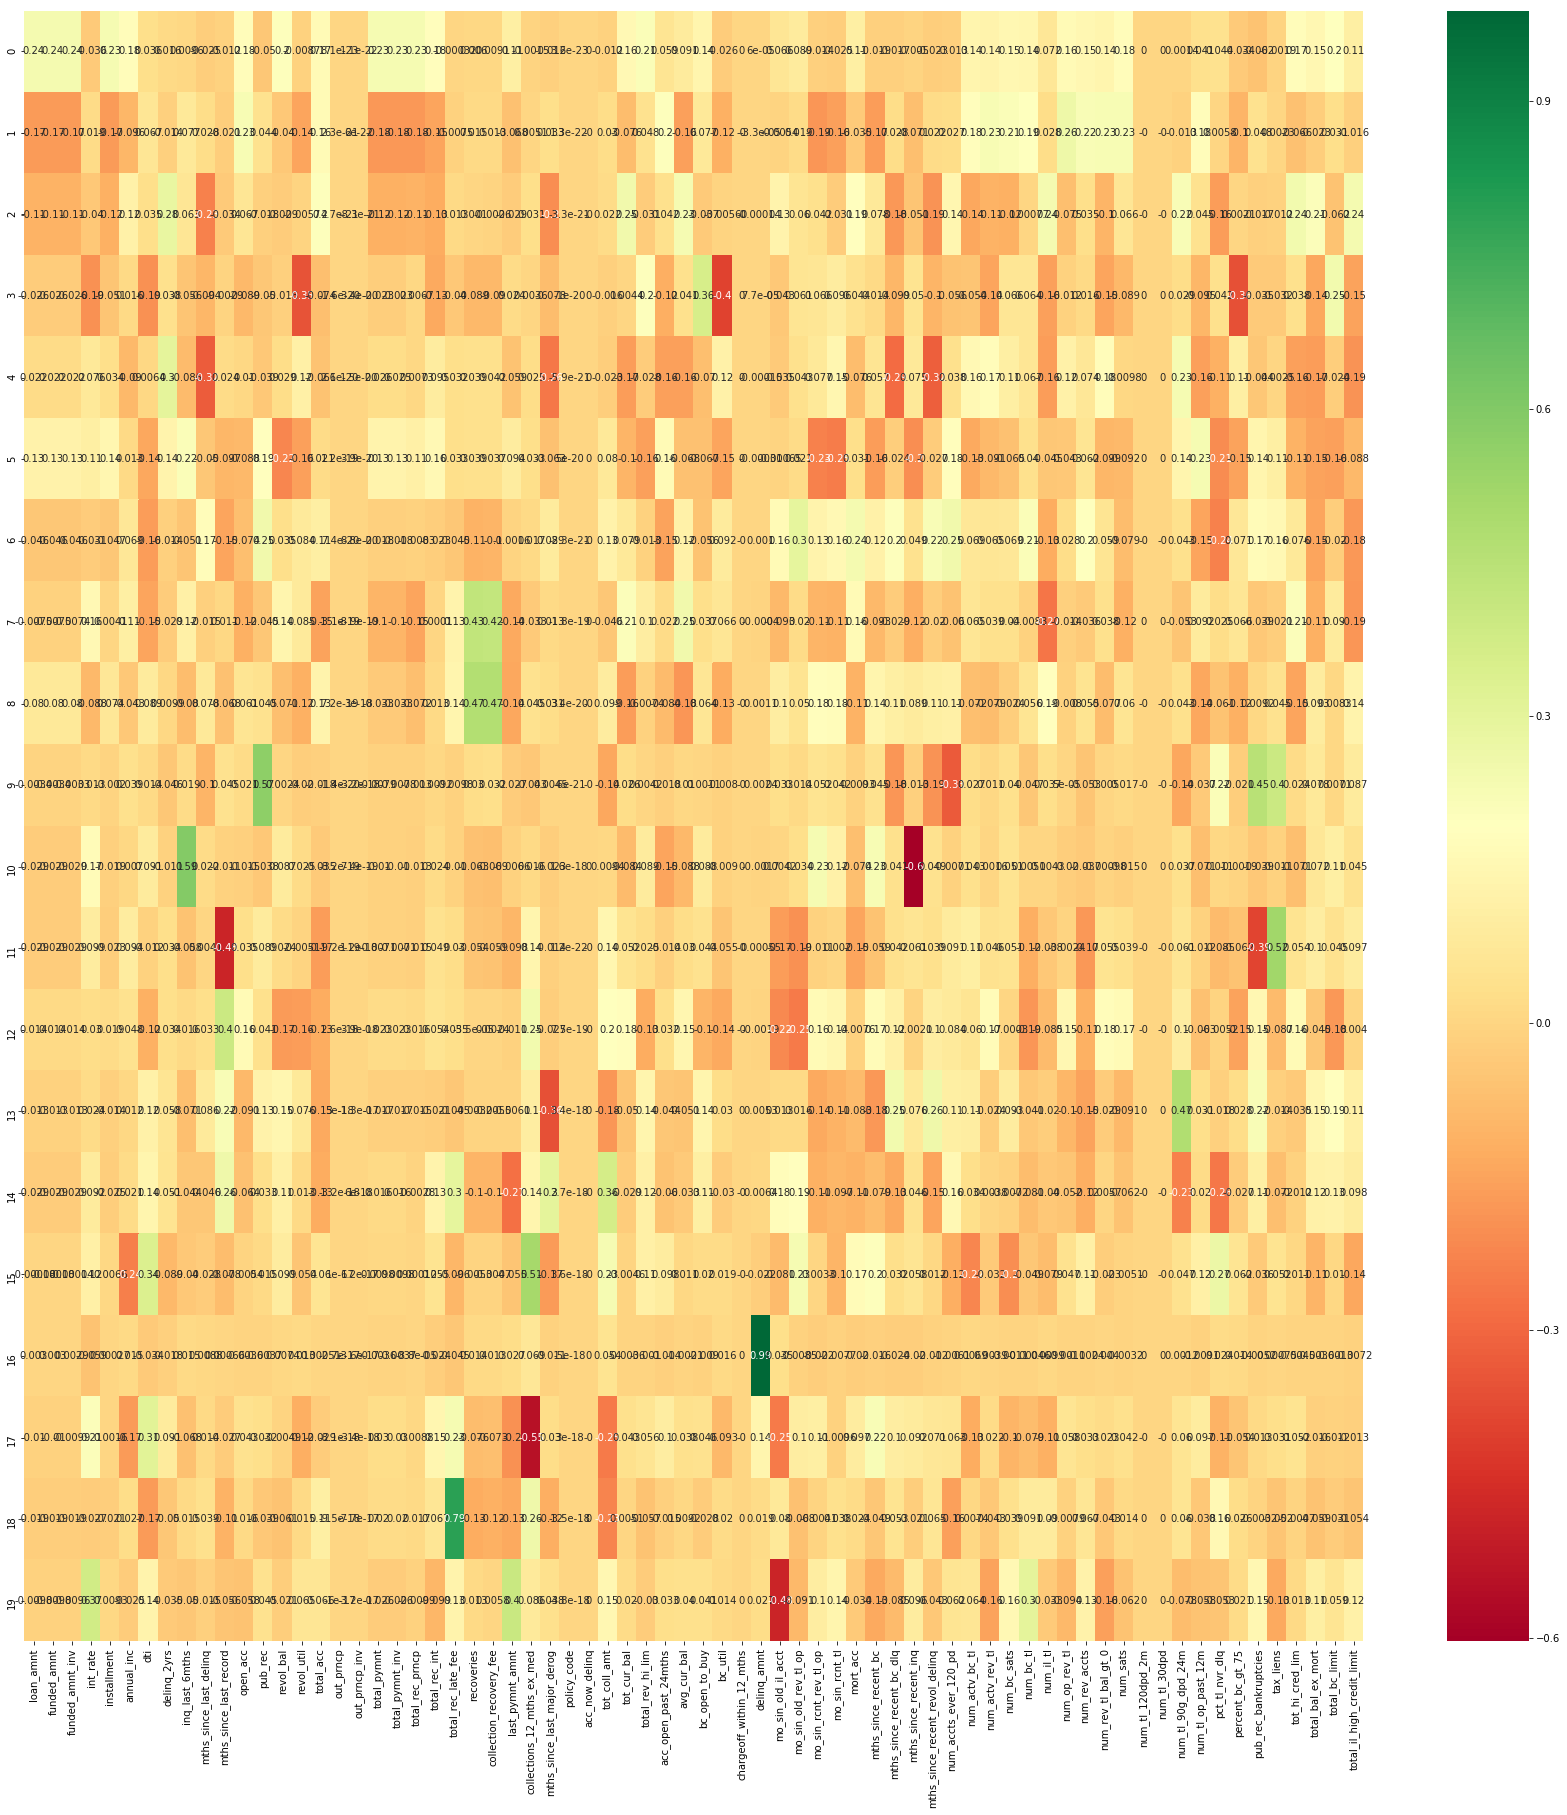

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
sns.heatmap(pca_LCD_numerics_only1,cmap='RdYlGn', annot=True)
plt.show()

In [81]:
#important variables are 
'loan_amnt', 'funded_amnt','num_actv_rev_tl','num_op_rev_tl','tot_cur_bal','delinq_2yrs','bc_open_to_buy','bc_util','mths_since_recent_revol_delinq','mths_since_last_delinq',
'mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','pub_rec','mo_sin_old_rev_tl_op','collection_recovery_fee','recoveries','pub_rec_bankruptcies',
'pub_rec','inq_last_6mths','mths_since_recent_inq','mths_since_last_record','tax_liens','mo_sin_old_rev_tl_op','mths_since_last_major_derog',
'num_tl_90g_dpd_24m','tot_coll_amt','dti','collections_12_mths_ex_med','int_rate','total_rec_late_fee'

('loan_amnt',
 'funded_amnt',
 'num_actv_rev_tl',
 'num_op_rev_tl',
 'tot_cur_bal',
 'delinq_2yrs',
 'bc_open_to_buy',
 'bc_util',
 'mths_since_recent_revol_delinq',
 'mths_since_last_delinq')

('mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'pub_rec',
 'mo_sin_old_rev_tl_op',
 'collection_recovery_fee',
 'recoveries',
 'pub_rec_bankruptcies')

('pub_rec',
 'inq_last_6mths',
 'mths_since_recent_inq',
 'mths_since_last_record',
 'tax_liens',
 'mo_sin_old_rev_tl_op',
 'mths_since_last_major_derog')

('num_tl_90g_dpd_24m',
 'tot_coll_amt',
 'dti',
 'collections_12_mths_ex_med',
 'int_rate',
 'total_rec_late_fee')

In [83]:
LCD_numerics_only2 = LCD_numerics_only1.loc[:, ('loan_amnt', 'funded_amnt','num_actv_rev_tl','num_op_rev_tl','tot_cur_bal','delinq_2yrs','bc_open_to_buy','bc_util','mths_since_recent_revol_delinq','mths_since_last_delinq',
'mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','pub_rec','mo_sin_old_rev_tl_op','collection_recovery_fee','recoveries','pub_rec_bankruptcies',
'pub_rec','inq_last_6mths','mths_since_recent_inq','mths_since_last_record','tax_liens','mo_sin_old_rev_tl_op','mths_since_last_major_derog',
'num_tl_90g_dpd_24m','tot_coll_amt','dti','collections_12_mths_ex_med','int_rate','total_rec_late_fee'	)]

In [85]:
LCD_numerics_only2.head()
LCD_numerics_only2.shape

,loan_amnt,funded_amnt,num_actv_rev_tl,num_op_rev_tl,tot_cur_bal,delinq_2yrs,bc_open_to_buy,bc_util,mths_since_recent_revol_delinq,mths_since_last_delinq,...,mths_since_last_record,tax_liens,mo_sin_old_rev_tl_op,mths_since_last_major_derog,num_tl_90g_dpd_24m,tot_coll_amt,dti,collections_12_mths_ex_med,int_rate,total_rec_late_fee
0,20000.0,20000.0,13.0,21.0,246496.0,0.0,26232.0,60.9,35.7,33.5,...,72.5,0.0,183.0,41.9,0.0,0.0,29.9,0.0,0.1,0.0
1,3500.0,3500.0,4.0,6.0,193069.0,0.0,2618.0,52.4,35.7,25.0,...,72.5,0.0,45.0,25.0,0.0,0.0,24.7,0.0,0.2,0.0
2,10000.0,10000.0,9.0,15.0,25664.0,0.0,29919.0,19.6,25.0,25.0,...,57.0,1.0,373.0,65.0,0.0,0.0,12.2,0.0,0.1,0.0
3,9950.0,9950.0,5.0,5.0,348578.0,0.0,8581.0,83.7,35.7,33.5,...,72.5,0.0,242.0,41.9,0.0,0.0,22.4,0.0,0.1,0.0
4,15000.0,15000.0,4.0,9.0,32592.0,0.0,26976.0,11.0,78.0,78.0,...,68.0,0.0,211.0,41.9,0.0,0.0,15.2,0.0,0.1,0.0


(34078, 30)

In [86]:
# Concat the numerical and categorical

In [88]:
x=pd.concat([LCD_numerics_only2,LCD_categorical_only3],axis=1)

In [89]:
x.head()

,loan_amnt,funded_amnt,num_actv_rev_tl,num_op_rev_tl,tot_cur_bal,delinq_2yrs,bc_open_to_buy,bc_util,mths_since_recent_revol_delinq,mths_since_last_delinq,...,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,20000.0,20000.0,13.0,21.0,246496.0,0.0,26232.0,60.9,35.7,33.5,...,443,45,229,0,25,36,0,0,0,0
1,3500.0,3500.0,4.0,6.0,193069.0,0.0,2618.0,52.4,35.7,25.0,...,282,9,47,1,24,56,0,0,0,0
2,10000.0,10000.0,9.0,15.0,25664.0,0.0,29919.0,19.6,25.0,25.0,...,797,44,249,1,35,43,0,0,0,0
3,9950.0,9950.0,5.0,5.0,348578.0,0.0,8581.0,83.7,35.7,33.5,...,753,4,305,0,35,43,0,0,0,0
4,15000.0,15000.0,4.0,9.0,32592.0,0.0,26976.0,11.0,78.0,78.0,...,293,9,226,0,13,21,0,0,0,0


In [90]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34078 entries, 0 to 34077
Data columns (total 52 columns):
loan_amnt                         34078 non-null float64
funded_amnt                       34078 non-null float64
num_actv_rev_tl                   34078 non-null float64
num_op_rev_tl                     34078 non-null float64
tot_cur_bal                       34078 non-null float64
delinq_2yrs                       34078 non-null float64
bc_open_to_buy                    34078 non-null float64
bc_util                           34078 non-null float64
mths_since_recent_revol_delinq    34078 non-null float64
mths_since_last_delinq            34078 non-null float64
mo_sin_rcnt_rev_tl_op             34078 non-null float64
mo_sin_rcnt_tl                    34078 non-null float64
pub_rec                           34078 non-null float64
mo_sin_old_rev_tl_op              34078 non-null float64
collection_recovery_fee           34078 non-null float64
recoveries                        34

In [92]:
y=x['loan_status']
y.head()

0    0
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int8

In [93]:
# Delete loan status from x
del x['loan_status']
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34078 entries, 0 to 34077
Data columns (total 51 columns):
loan_amnt                         34078 non-null float64
funded_amnt                       34078 non-null float64
num_actv_rev_tl                   34078 non-null float64
num_op_rev_tl                     34078 non-null float64
tot_cur_bal                       34078 non-null float64
delinq_2yrs                       34078 non-null float64
bc_open_to_buy                    34078 non-null float64
bc_util                           34078 non-null float64
mths_since_recent_revol_delinq    34078 non-null float64
mths_since_last_delinq            34078 non-null float64
mo_sin_rcnt_rev_tl_op             34078 non-null float64
mo_sin_rcnt_tl                    34078 non-null float64
pub_rec                           34078 non-null float64
mo_sin_old_rev_tl_op              34078 non-null float64
collection_recovery_fee           34078 non-null float64
recoveries                        34

In [94]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(25558, 51)

(8520, 51)

(25558,)

(8520,)

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
log=LogisticRegression()

In [98]:
log.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [99]:
log.coef_

array([[ 2.14544057e-05,  2.14544057e-05,  5.33005874e-04,
         6.44645110e-04, -6.50473191e-06,  3.05467897e-06,
         9.05127926e-05,  4.34559000e-03,  1.86871963e-03,
         1.82878568e-03,  5.19887305e-05, -4.17226309e-04,
         1.52291316e-05,  1.05090470e-02, -9.34159018e-04,
        -1.21538569e-03,  2.17461720e-05,  1.52291316e-05,
        -2.78751784e-06,  2.91056345e-04,  3.14845059e-03,
         3.49924159e-06,  1.05090470e-02,  2.30048138e-03,
        -1.17320169e-05,  1.78791945e-03,  7.01912312e-04,
        -8.36790071e-06, -1.05899698e-05, -4.67643234e-04,
        -2.71139489e-04, -8.97341259e-04, -3.92835016e-03,
        -7.46019706e-03, -1.03509646e-03, -5.29001005e-04,
        -6.64257344e-04, -4.61736192e-04, -2.71139489e-04,
        -1.80680039e-03, -4.04669798e-02, -3.46173054e-02,
        -5.46694726e-03, -2.58957664e-02, -4.02817540e-04,
        -7.66682456e-03, -1.00548065e-02, -2.71139489e-04,
        -2.71139489e-04, -2.71139489e-04, -2.74669645e-0

In [121]:
# find out key predictor
coeff = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(np.transpose(log.coef_))], axis=1)

In [122]:
coeff.columns = ("Variable", "Coeff")

ValueError: Length mismatch: Expected axis has 4 elements, new values have 2 elements